In [30]:
import pandas as pd 
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import tensorflow as tf

#csvfile = "Data_testing_VMC.csv"  #VMC
#csvfile = "Data_testing_PRA.csv"  #PRA
csvfile = "Data_testing_AVF.csv"  #AVF
csvfile = "Data_test_AVF100.csv"  #AVF

In [31]:
data_test= pd.read_csv(csvfile)
data_test.head()

,Episode,Kick_Speed,friction,Rewards,Stop_Distance
0,0,71.37,0.9,-50.23,3.90
1,1,77.25,0.9,-66.86,3.45
2,2,74.43,0.9,-50.23,3.90
3,3,72.78,0.9,-50.21,3.90
4,4,68.20,0.9,-50.20,3.90


In [18]:
profile = ProfileReport(data_test, minimal=True)
profile.to_file(output_file="output.html")

In [32]:
failed = data_test[data_test['Stop_Distance'] <= 0]
passed = data_test[data_test['Stop_Distance'] > 0]

print('Size of crashes :',failed.shape[0])  
print('Size of success :',passed.shape[0]) 
print("Percentage of crash cases:{:.2f}".format(failed.shape[0]*100/(failed.shape[0]+passed.shape[0])),"%")
print("Percentage of not crashed cases:{:.2f}".format(passed.shape[0]*100/(failed.shape[0]+passed.shape[0])),"%")

#failed.to_csv("crashed.csv",index=False)
#failed.head()

Size of crashes : 100
Size of success : 480
Percentage of crash cases:17.24 %
Percentage of not crashed cases:82.76 %


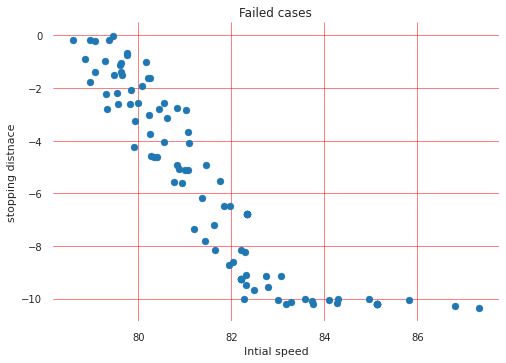

In [33]:
fig=plt.figure
plt.scatter(failed["Kick_Speed"],failed["Stop_Distance"],label='Line 2')
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.title("Failed cases")
plt.xlabel("Intial speed")
plt.ylabel("stopping distnace")
plt.show()

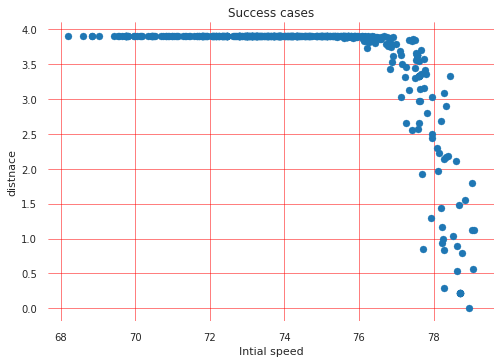

In [34]:
fig=plt.figure
plt.scatter(passed["Kick_Speed"],passed["Stop_Distance"])
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.title("Success cases")
plt.xlabel("Intial speed")
plt.ylabel("distnace")
plt.show()

In [35]:
data_test.loc[data_test['Stop_Distance'] <= 0, 'test'] = int(1)
data_test.loc[data_test['Stop_Distance'] > 0, 'test'] = int(0)
data_test.head()

,Episode,Kick_Speed,friction,Rewards,Stop_Distance,test
0,0,71.37,0.9,-50.23,3.90,0.0
1,1,77.25,0.9,-66.86,3.45,0.0
2,2,74.43,0.9,-50.23,3.90,0.0
3,3,72.78,0.9,-50.21,3.90,0.0
4,4,68.20,0.9,-50.20,3.90,0.0


Total number of episodes: 580
Number of Pass: 480
Number of fail: 100


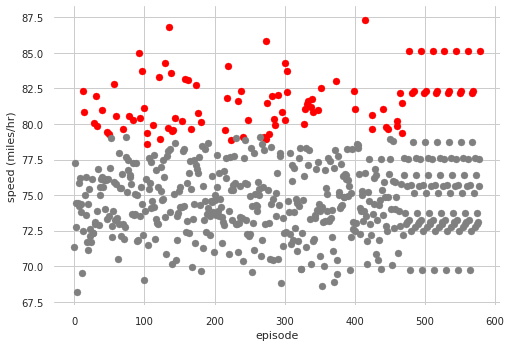

In [37]:
print('Total number of episodes:',data_test['Episode'].shape[0])
start=0
end=data_test['Episode'].shape[0]

fig, ax = plt.subplots()
episode=np.array(data_test['Episode'].values.tolist()[start:end])
test=np.array(data_test['test'].values.tolist()[start:end])
speed=np.array(data_test['Kick_Speed'].values.tolist()[start:end])

indices = test == 0
print('Number of Pass:',indices.sum())
print('Number of fail:',indices.shape[0]-indices.sum())

# normal values
ax.scatter(episode[~indices], speed[~indices], c = 'red',label='fail')
# bad values
ax.scatter(episode[indices], speed[indices], c = 'grey',label='Pass')
#ax.legend()
#ax.set_ylim([0,95])
plt.xlabel('episode')
plt.ylabel('speed (miles/hr)')
ax.grid(True) 
plt.show()